*** 
# Assignment 4: Problem #2 - "Frozen Lake"
*** 

In [1]:
!pip install mdptoolbox-hiive
!pip install gym
!pip install gym[toy_text]
!pip install pymdptoolbox
!pip install git+https://github.com/hiive/hiivemdptoolbox.git

  Cloning https://github.com/hiive/hiivemdptoolbox.git to c:\users\js\appdata\local\temp\pip-req-build-_fvjh3ij
  Resolved https://github.com/hiive/hiivemdptoolbox.git to commit dd44587196f698ecbe34ab51eed3b13051e82c1b

  Running command git clone -q https://github.com/hiive/hiivemdptoolbox.git 'C:\Users\JS\AppData\Local\Temp\pip-req-build-_fvjh3ij'


In [46]:
import hiive.mdptoolbox
import hiive.mdptoolbox.mdp
import hiive.mdptoolbox.example
import hiive.mdptoolbox.openai
import gym
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

*** 
## Problem Setup
***

In [2]:
"""

Source:
- https://www.gymlibrary.dev/environments/toy_text/frozen_lake/#frozen-lake
- https://github.com/openai/gym/blob/master/gym/envs/toy_text/frozen_lake.py
- https://edstem.org/us/courses/25926/discussion/2138941 
- https://github.com/hiive/hiivemdptoolbox/blob/master/hiive/mdptoolbox/openai.py

Notes:
- Frozen lake involves crossing a frozen lake from Start(S) to Goal(G) without falling into any Holes(H) 
by walking over the Frozen(F) lake. The agent may not always move in the intended direction due to the slippery 
nature of the frozen lake.
- Action Space:
    - 0: Left
    - 1: Down
    - 2: Right
    - 3: Up
- map_name="4x4" --> ["SFFF", 
                      "FHFH", 
                      "FFFH", 
                      "HFFG"]
                      
- is_slippery: True/False. If True will move in intended direction with probability of 1/3 else will 
move in either perpendicular direction with equal probability of 1/3 in both directions.

"""

P = dict()
R = dict()

frozen_lake_4x4 = hiive.mdptoolbox.openai.OpenAI_MDPToolbox("FrozenLake-v1", is_slippery=False, map_name="4x4")
P['4x4'] = frozen_lake_4x4.P
R['4x4'] = frozen_lake_4x4.R

frozen_lake_8x8 = hiive.mdptoolbox.openai.OpenAI_MDPToolbox("FrozenLake-v1", is_slippery=False, map_name="8x8")
P['8x8'] = frozen_lake_8x8.P
R['8x8'] = frozen_lake_8x8.R

# Value Iteration dictionary to capture effect of modifiying state-space
vi_discount = dict()
vi_epsilon = dict()
vi_value = dict()
vi_iterations = dict()
vi_time = dict()

# Policy Iteration dictionary to capture effect of modifiying state-space
pi_discount = dict()
pi_epsilon = dict()
pi_value = dict()
pi_iterations = dict()
pi_time = dict()

# Q-Learning dictionary to capture effect of modifiying state-space
ql_discount = dict()
ql_epsilon = dict()
ql_value = dict()
ql_iterations = dict()
ql_time = dict()
ql_alpha = dict()
ql_alpha_d = dict()
ql_epsilon_d = dict()

In [3]:
frozen_lake_4x4.transitions

{0: {0: [(1.0, 0, 0.0, False)],
  1: [(1.0, 4, 0.0, False)],
  2: [(1.0, 1, 0.0, False)],
  3: [(1.0, 0, 0.0, False)]},
 1: {0: [(1.0, 0, 0.0, False)],
  1: [(1.0, 5, 0.0, True)],
  2: [(1.0, 2, 0.0, False)],
  3: [(1.0, 1, 0.0, False)]},
 2: {0: [(1.0, 1, 0.0, False)],
  1: [(1.0, 6, 0.0, False)],
  2: [(1.0, 3, 0.0, False)],
  3: [(1.0, 2, 0.0, False)]},
 3: {0: [(1.0, 2, 0.0, False)],
  1: [(1.0, 7, 0.0, True)],
  2: [(1.0, 3, 0.0, False)],
  3: [(1.0, 3, 0.0, False)]},
 4: {0: [(1.0, 4, 0.0, False)],
  1: [(1.0, 8, 0.0, False)],
  2: [(1.0, 5, 0.0, True)],
  3: [(1.0, 0, 0.0, False)]},
 5: {0: [(1.0, 5, 0, True)],
  1: [(1.0, 5, 0, True)],
  2: [(1.0, 5, 0, True)],
  3: [(1.0, 5, 0, True)]},
 6: {0: [(1.0, 5, 0.0, True)],
  1: [(1.0, 10, 0.0, False)],
  2: [(1.0, 7, 0.0, True)],
  3: [(1.0, 2, 0.0, False)]},
 7: {0: [(1.0, 7, 0, True)],
  1: [(1.0, 7, 0, True)],
  2: [(1.0, 7, 0, True)],
  3: [(1.0, 7, 0, True)]},
 8: {0: [(1.0, 8, 0.0, False)],
  1: [(1.0, 12, 0.0, True)],
  2: [(

In [4]:
P['4x4'][0][0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [5]:
P['4x4'].shape

(4, 16, 16)

In [6]:
P['4x4'][0].shape

(16, 16)

In [7]:
R['4x4']

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 0.]])

In [8]:
R['4x4'].shape

(16, 4)

*** 
## Value Iteration
***

 Iteration   Variation
         1    1.000000
         2    0.500000
         3    0.250000
         4    0.125000
         5    0.062500
         6    0.031250
         7    0.000000
Iterating stopped, epsilon-optimal policy found.
[0, 1, 2, 3, 4, 5, 6]
[0.0625, 0.125, 0.15625, 0.171875, 0.18359375, 0.185546875, 0.185546875]


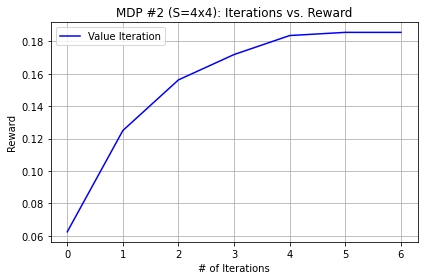

In [32]:
"""
Find iterations for convergence given gamma and epsilon

"""
# declare state-size
ss = '4x4'
vi = hiive.mdptoolbox.mdp.ValueIteration(P[ss], R[ss], gamma =.5, epsilon=0.01)
vi.setVerbose()
vi.run()
val = np.mean(vi.V)
ite = vi.iter
tim = vi.time
stats = vi.run_stats

iterlist = []
rewardlist = []
for i in range(0, len(stats)):
    iterlist.append(i)
    rewardlist.append(stats[i]['Mean V'])
print(iterlist)
print(rewardlist)
    
# plot and show: Iterations vs. Reward given Gamma
plt.plot(iterlist, rewardlist, color="blue", label="Value Iteration")
plt.title("MDP #2 (S={}): Iterations vs. Reward".format(ss))
plt.xlabel("# of Iterations"), plt.ylabel("Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

 Iteration   Variation
         1    1.000000
Iterating stopped due to maximum number of iterations condition.
 Iteration   Variation
         1    1.000000
         2    0.100000
Iterating stopped due to maximum number of iterations condition.
 Iteration   Variation
         1    1.000000
         2    0.150000
Iterating stopped due to maximum number of iterations condition.
 Iteration   Variation
         1    1.000000
         2    0.200000
Iterating stopped due to maximum number of iterations condition.
 Iteration   Variation
         1    1.000000
         2    0.250000
         3    0.062500
Iterating stopped due to maximum number of iterations condition.
 Iteration   Variation
         1    1.000000
         2    0.300000
         3    0.090000
         4    0.027000
Iterating stopped due to maximum number of iterations condition.
 Iteration   Variation
         1    1.000000
         2    0.350000
         3    0.122500
         4    0.042875
Iterating stopped due to maximum nu

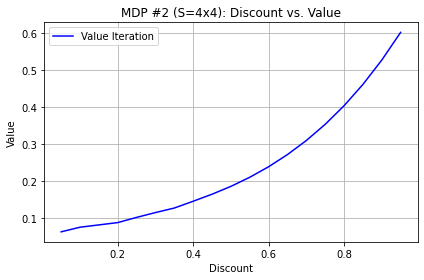

In [33]:
"""
Tune for gamma holding epsilon constant

"""

# declare state-size
ss = '4x4'
vi_discount[ss] = []
vi_epsilon[ss] = []
vi_value[ss] = []
vi_iterations[ss] = []
vi_time[ss] = []

epsilon = .01
for gamma in np.arange(0.05, 1, .05):
    vi = hiive.mdptoolbox.mdp.ValueIteration(P[ss], R[ss], gamma=gamma, epsilon=epsilon)
    vi.setVerbose()
    vi.run()
    val = np.mean(vi.V)
    ite = vi.iter
    tim = vi.time
    
    vi_discount[ss].append(gamma)
    vi_epsilon[ss].append(epsilon)
    vi_value[ss].append(val)
    vi_iterations[ss].append(ite)
    vi_time[ss].append(tim)
    
#     print("discount rate: ", gamma)
#     print("iterations: ", ite)
#     print("wall-clock time: ", tim)
#     print()
#     print("policy: " , vi.policy)
    
# plot and show: Gamma vs. Value
plt.plot(vi_discount[ss], vi_value[ss], color="blue", label="Value Iteration")
plt.title("MDP #2 (S={}): Discount vs. Value".format(ss))
plt.xlabel("Discount"), plt.ylabel("Value"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

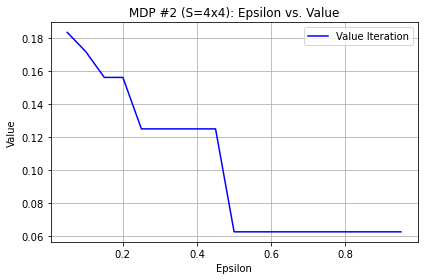

In [34]:
"""
Tune for epsilon holding gamma constant

"""

# declare state-size
ss = '4x4'
vi_discount[ss] = []
vi_epsilon[ss] = []
vi_value[ss] = []
vi_iterations[ss] = []
vi_time[ss] = []

gamma = .5
for epsilon in np.arange(0.05, 1, .05):
    vi = hiive.mdptoolbox.mdp.ValueIteration(P[ss], R[ss], gamma=gamma, epsilon=epsilon)
    #vi.setVerbose()
    vi.run()
    val = np.mean(vi.V)
    ite = vi.iter
    tim = vi.time
    
    vi_discount[ss].append(gamma)
    vi_epsilon[ss].append(epsilon)
    vi_value[ss].append(val)
    vi_iterations[ss].append(ite)
    vi_time[ss].append(tim)
    
#     print("discount rate: ", gamma)
#     print("iterations: ", ite)
#     print("wall-clock time: ", tim)
#     print()
#     print("policy: " , vi.policy)
    
# plot and show: Gamma vs. Value
plt.plot(vi_epsilon[ss], vi_value[ss], color="blue", label="Value Iteration")
plt.title("MDP #2 (S={}): Epsilon vs. Value".format(ss))
plt.xlabel("Epsilon"), plt.ylabel("Value"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

0.01
0.21
0.41
0.61
0.81


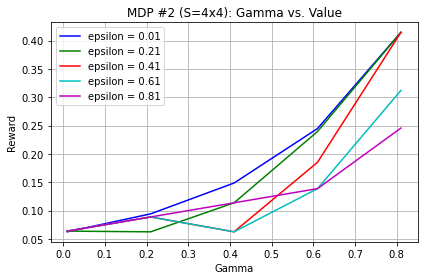

In [40]:
"""
Tune for epsilon and gamma together

"""


# declare state-size
ss = '4x4'
vi_discount[ss] = []
vi_epsilon[ss] = dict()
vi_value[ss] = dict()
vi_iterations[ss] = []
vi_time[ss] = []

for epsilon in np.arange(0.01, 1, .2):
    epsilon = round(epsilon, 2)
    vi_epsilon[ss][str(epsilon)] = []
    vi_value[ss][str(epsilon)] = []
    print(str(epsilon))
    for gamma in np.arange(0.01, 1, .2):
        vi = hiive.mdptoolbox.mdp.ValueIteration(P[ss], R[ss], gamma=gamma, epsilon=epsilon)
        #vi.setVerbose()
        vi.run()
        val = np.mean(vi.V)
        ite = vi.iter
        tim = vi.time
        vi_epsilon[ss][str(epsilon)].append(gamma)
        vi_value[ss][str(epsilon)].append(val)


    
# plot and show: Gamma vs. Value
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'gray', 'fuchsia']
count = 0
for epsilon in np.arange(0.01, 1, .2):
    epsilon = str(round(epsilon ,2))
    plt.plot(vi_epsilon[ss][epsilon], vi_value[ss][epsilon], color=colors[count], label="epsilon = {}".format(epsilon))
    count+=1
plt.title("MDP #2 (S={}): Gamma vs. Value".format(ss))
plt.xlabel("Gamma"), plt.ylabel("Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

 Iteration   Variation
         1    1.000000
         2    0.999990
         3    0.999980
         4    0.999970
         5    0.999960
         6    0.999950
         7    0.000000
Iterating stopped, epsilon-optimal policy found.
[0, 1, 2, 3, 4, 5, 6]
[0.0625, 0.18749875, 0.31249625001250003, 0.43749250004999996, 0.6249850001624992, 0.6874818752249987, 0.6874818752249987]
rewards delta:  [0.12499875 0.1249975  0.12499625 0.1874925  0.06249688 0.        ]
index where delta converged:  5


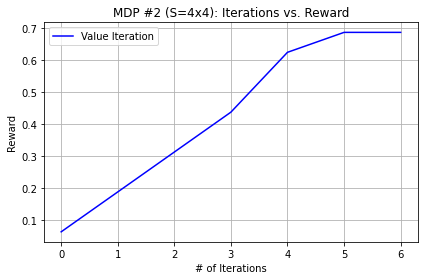

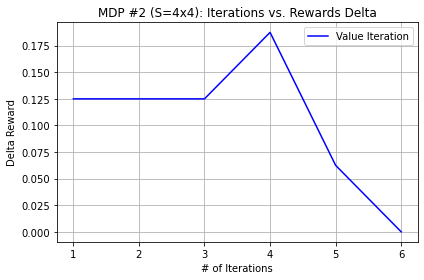

In [49]:
"""
Find iterations for convergence given gamma and epsilon

"""
# declare state-size
ss = '4x4'
vi = hiive.mdptoolbox.mdp.ValueIteration(P[ss], R[ss], gamma =.99999, epsilon=0.00001)
vi.setVerbose()
vi.run()
val = np.mean(vi.V)
ite = vi.iter
tim = vi.time
stats = vi.run_stats

iterlist = []
rewardlist = []

for i in range(0, len(stats)):
    iterlist.append(i)
    rewardlist.append(stats[i]['Mean V'])
print(iterlist)
print(rewardlist)
delta = np.diff(rewardlist)
print("rewards delta: ", delta)
delta_delta = np.diff(delta)

for ix in range(0, len(delta)):
    if abs(delta[ix]) < .05:
        print("index where delta converged: ", ix)
        break
    
    
# plot and show: Iterations vs. Reward given Gamma
plt.plot(iterlist, rewardlist, color="blue", label="Value Iteration")
plt.title("MDP #2 (S={}): Iterations vs. Reward".format(ss))
plt.xlabel("# of Iterations"), plt.ylabel("Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

# plot and show: Iterations vs. Delta given Gamma
plt.plot(iterlist[1:], delta, color="blue", label="Value Iteration")
plt.title("MDP #2 (S={}): Iterations vs. Rewards Delta".format(ss))
plt.xlabel("# of Iterations"), plt.ylabel("Delta Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

 Iteration   Variation
         1    1.000000
         2    0.970000
         3    0.940900
         4    0.912673
         5    0.885293
         6    0.858734
         7    0.000000
Iterating stopped, epsilon-optimal policy found.
[0, 1, 2, 3, 4, 5, 6]
[0.0625, 0.18375, 0.3013625, 0.41544662499999996, 0.581439026875, 0.63510990348125, 0.63510990348125]
rewards delta:  [0.12125    0.1176125  0.11408412 0.1659924  0.05367088 0.        ]
index where delta converged:  5


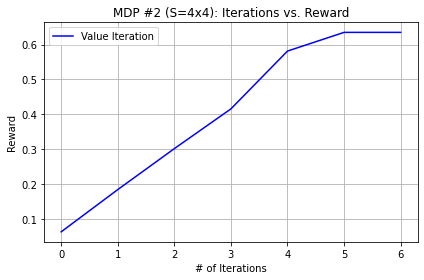

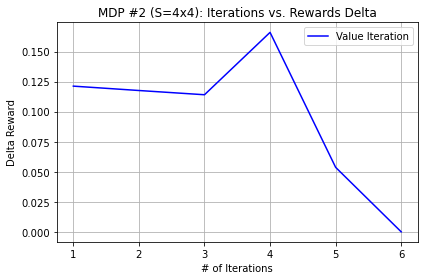

In [45]:
"""
Find iterations for convergence given gamma and epsilon

"""
# declare state-size
ss = '4x4'
vi = hiive.mdptoolbox.mdp.ValueIteration(P[ss], R[ss], gamma =.97, epsilon=0.01)
vi.setVerbose()
vi.run()
val = np.mean(vi.V)
ite = vi.iter
tim = vi.time
stats = vi.run_stats

iterlist = []
rewardlist = []

for i in range(0, len(stats)):
    iterlist.append(i)
    rewardlist.append(stats[i]['Mean V'])
print(iterlist)
print(rewardlist)
delta = np.diff(rewardlist)
print("rewards delta: ", delta)
delta_delta = np.diff(delta)

for ix in range(0, len(delta)):
    if abs(delta[ix]) < .05:
        print("index where delta converged: ", ix)
        break
    
# plot and show: Iterations vs. Reward given Gamma
plt.plot(iterlist, rewardlist, color="blue", label="Value Iteration")
plt.title("MDP #2 (S={}): Iterations vs. Reward".format(ss))
plt.xlabel("# of Iterations"), plt.ylabel("Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

# plot and show: Iterations vs. Delta given Gamma
plt.plot(iterlist[1:], delta, color="blue", label="Value Iteration")
plt.title("MDP #2 (S={}): Iterations vs. Rewards Delta".format(ss))
plt.xlabel("# of Iterations"), plt.ylabel("Delta Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

 Iteration   Variation
         1    1.000000
         2    0.960000
         3    0.921600
         4    0.884736
         5    0.849347
         6    0.815373
         7    0.000000
Iterating stopped, epsilon-optimal policy found.
[0, 1, 2, 3, 4, 5, 6]
[0.0625, 0.1825, 0.29769999999999996, 0.408292, 0.56754448, 0.6185052736, 0.6185052736]
rewards delta:  [0.12       0.1152     0.110592   0.15925248 0.05096079 0.        ]
index where delta converged:  5


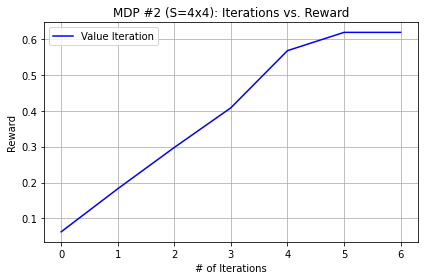

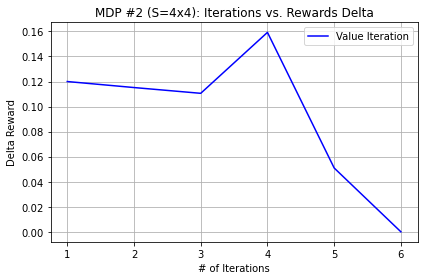

In [48]:
"""
Find iterations for convergence given gamma and epsilon

"""
# declare state-size
ss = '4x4'
vi = hiive.mdptoolbox.mdp.ValueIteration(P[ss], R[ss], gamma =.96, epsilon=0.01)
vi.setVerbose()
vi.run()
val = np.mean(vi.V)
ite = vi.iter
tim = vi.time
stats = vi.run_stats

iterlist = []
rewardlist = []

for i in range(0, len(stats)):
    iterlist.append(i)
    rewardlist.append(stats[i]['Mean V'])
print(iterlist)
print(rewardlist)
delta = np.diff(rewardlist)
print("rewards delta: ", delta)
delta_delta = np.diff(delta)

for ix in range(0, len(delta)):
    if abs(delta[ix]) < .05:
        print("index where delta converged: ", ix)
        break
    
# plot and show: Iterations vs. Reward given Gamma
plt.plot(iterlist, rewardlist, color="blue", label="Value Iteration")
plt.title("MDP #2 (S={}): Iterations vs. Reward".format(ss))
plt.xlabel("# of Iterations"), plt.ylabel("Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

# plot and show: Iterations vs. Delta given Gamma
plt.plot(iterlist[1:], delta, color="blue", label="Value Iteration")
plt.title("MDP #2 (S={}): Iterations vs. Rewards Delta".format(ss))
plt.xlabel("# of Iterations"), plt.ylabel("Delta Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

 Iteration   Variation
         1    1.000000
         2    0.960000
         3    0.921600
         4    0.884736
         5    0.849347
         6    0.815373
         7    0.000000
Iterating stopped, epsilon-optimal policy found.
[0, 1, 2, 3, 4, 5, 6]
[0.0625, 0.1825, 0.29769999999999996, 0.408292, 0.56754448, 0.6185052736, 0.6185052736]
rewards delta:  [0.12       0.1152     0.110592   0.15925248 0.05096079 0.        ]
index where delta converged:  5


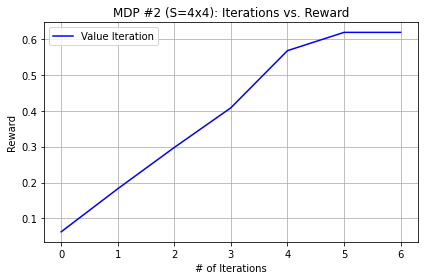

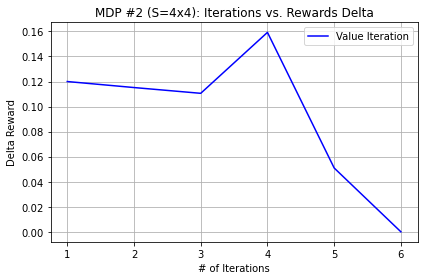

total time
[0.0, 0.0009958744049072266, 0.0009958744049072266, 0.0009958744049072266, 0.0009958744049072266, 0.0009958744049072266, 0.0009958744049072266]


In [10]:
"""
Find iterations for convergence given gamma and epsilon

"""
# declare state-size
ss = '4x4'
vi = hiive.mdptoolbox.mdp.ValueIteration(P[ss], R[ss], gamma =.96, epsilon=0.01)
vi.setVerbose()
vi.run()
val = np.mean(vi.V)
ite = vi.iter
tim = vi.time
stats = vi.run_stats

iterlist = []
rewardlist = []
timelist = []

for i in range(0, len(stats)):
    iterlist.append(i)
    rewardlist.append(stats[i]['Mean V'])
    timelist.append(stats[i]['Time'])

print(iterlist)
print(rewardlist)
delta = np.diff(rewardlist)
print("rewards delta: ", delta)
delta_delta = np.diff(delta)

for ix in range(0, len(delta)):
    if abs(delta[ix]) < .05:
        print("index where delta converged: ", ix)
        break
    
# plot and show: Iterations vs. Reward given Gamma
plt.plot(iterlist, rewardlist, color="blue", label="Value Iteration")
plt.title("MDP #2 (S={}): Iterations vs. Reward".format(ss))
plt.xlabel("# of Iterations"), plt.ylabel("Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

# plot and show: Iterations vs. Delta given Gamma
plt.plot(iterlist[1:], delta, color="blue", label="Value Iteration")
plt.title("MDP #2 (S={}): Iterations vs. Rewards Delta".format(ss))
plt.xlabel("# of Iterations"), plt.ylabel("Delta Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

print("total time")
print(timelist)

 Iteration   Variation
         1    1.000000
         2    0.960000
         3    0.921600
         4    0.884736
         5    0.849347
         6    0.815373
         7    0.000000
Iterating stopped, epsilon-optimal policy found.
[0, 1, 2, 3, 4, 5, 6]
[0.0625, 0.1825, 0.29769999999999996, 0.408292, 0.56754448, 0.6185052736, 0.6185052736]
rewards delta:  [0.12       0.1152     0.110592   0.15925248 0.05096079 0.        ]
index where delta converged:  5


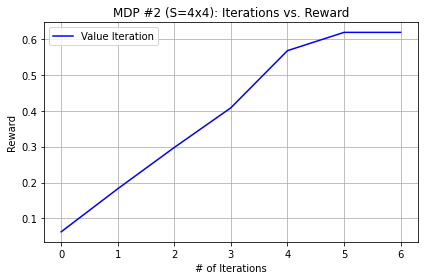

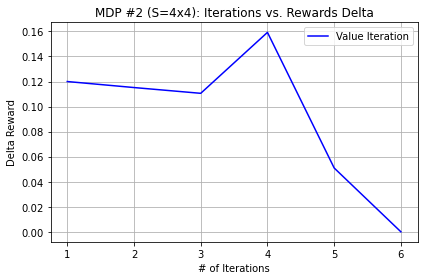

total time
[0.0, 0.0, 0.0, 0.0009963512420654297, 0.0009963512420654297, 0.0009963512420654297, 0.0019931793212890625]


In [43]:
"""
Find iterations for convergence given gamma and epsilon

"""
# declare state-size
ss = '4x4'
vi = hiive.mdptoolbox.mdp.ValueIteration(P[ss], R[ss], gamma =.96, epsilon=0.01)
vi.setVerbose()
vi.run()
val = np.mean(vi.V)
ite = vi.iter
tim = vi.time
stats = vi.run_stats
policy = vi.policy

iterlist = []
rewardlist = []
timelist = []

for i in range(0, len(stats)):
    iterlist.append(i)
    rewardlist.append(stats[i]['Mean V'])
    timelist.append(stats[i]['Time'])

print(iterlist)
print(rewardlist)
delta = np.diff(rewardlist)
print("rewards delta: ", delta)
delta_delta = np.diff(delta)

for ix in range(0, len(delta)):
    if abs(delta[ix]) < .05:
        print("index where delta converged: ", ix)
        break
    
# plot and show: Iterations vs. Reward given Gamma
plt.plot(iterlist, rewardlist, color="blue", label="Value Iteration")
plt.title("MDP #2 (S={}): Iterations vs. Reward".format(ss))
plt.xlabel("# of Iterations"), plt.ylabel("Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

# plot and show: Iterations vs. Delta given Gamma
plt.plot(iterlist[1:], delta, color="blue", label="Value Iteration")
plt.title("MDP #2 (S={}): Iterations vs. Rewards Delta".format(ss))
plt.xlabel("# of Iterations"), plt.ylabel("Delta Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

print("total time")
print(timelist)

In [44]:
policy

(1, 2, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 2, 2, 0)

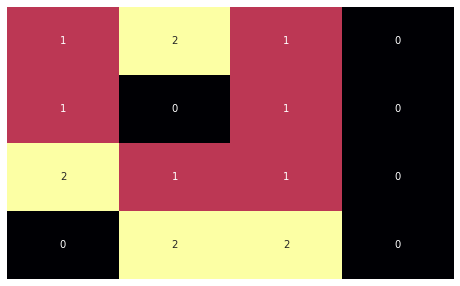

In [47]:
def plot_policy(policy, x, y):
    plt.figure(figsize=(8, 5))
    policy_2d = np.array(list(policy)).reshape(x, y)
    ax = sns.heatmap(policy_2d, cmap='inferno', annot=True, yticklabels=False, xticklabels=False, cbar=False)
    plt.show()
    
plot_policy(policy, 4, 4)

 Iteration   Variation
         1    1.000000
         2    0.960000
         3    0.921600
         4    0.884736
         5    0.849347
         6    0.815373
         7    0.782758
         8    0.751447
         9    0.721390
        10    0.692534
        11    0.664833
        12    0.638239
        13    0.612710
        14    0.588201
        15    0.000000
Iterating stopped, epsilon-optimal policy found.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[0.03125, 0.06125, 0.10444999999999999, 0.145922, 0.19900616, 0.24996695359999999, 0.31111990592, 0.36982674014719996, 0.41491358883368956, 0.47983865094223455, 0.5421667105664378, 0.5920291582658004, 0.6207499281406332, 0.6299405745005797, 0.6299405745005797]
rewards delta:  [0.03       0.0432     0.041472   0.05308416 0.05096079 0.06115295
 0.05870683 0.04508685 0.06492506 0.06232806 0.04986245 0.02872077
 0.00919065 0.        ]
index where delta converged:  0


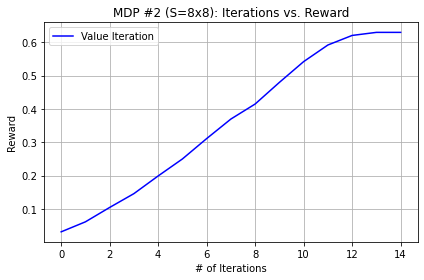

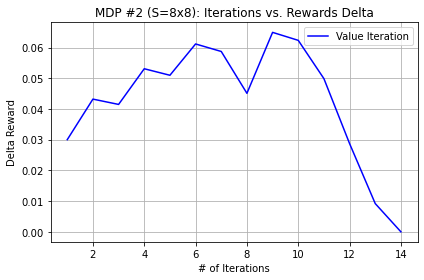

In [52]:
"""
Find iterations for convergence given gamma and epsilon

"""
# declare state-size
ss = '8x8'
vi = hiive.mdptoolbox.mdp.ValueIteration(P[ss], R[ss], gamma =.96, epsilon=0.01)
vi.setVerbose()
vi.run()
val = np.mean(vi.V)
ite = vi.iter
tim = vi.time
stats = vi.run_stats

iterlist = []
rewardlist = []
timelist = []

for i in range(0, len(stats)):
    iterlist.append(i)
    rewardlist.append(stats[i]['Mean V'])
    timelist.append(stats[i]['Time'])
print(iterlist)
print(rewardlist)
delta = np.diff(rewardlist)
print("rewards delta: ", delta)
delta_delta = np.diff(delta)

for ix in range(0, len(delta)):
    if abs(delta[ix]) < .05:
        print("index where delta converged: ", ix)
        break
    
# plot and show: Iterations vs. Reward given Gamma
plt.plot(iterlist, rewardlist, color="blue", label="Value Iteration")
plt.title("MDP #2 (S={}): Iterations vs. Reward".format(ss))
plt.xlabel("# of Iterations"), plt.ylabel("Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

# plot and show: Iterations vs. Delta given Gamma
plt.plot(iterlist[1:], delta, color="blue", label="Value Iteration")
plt.title("MDP #2 (S={}): Iterations vs. Rewards Delta".format(ss))
plt.xlabel("# of Iterations"), plt.ylabel("Delta Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

print("total time")
print(timelist)

 Iteration   Variation
         1    1.000000
         2    0.960000
         3    0.921600
         4    0.884736
         5    0.849347
         6    0.815373
         7    0.782758
         8    0.751447
         9    0.721390
        10    0.692534
        11    0.664833
        12    0.638239
        13    0.612710
        14    0.588201
        15    0.000000
Iterating stopped, epsilon-optimal policy found.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[0.03125, 0.06125, 0.10444999999999999, 0.145922, 0.19900616, 0.24996695359999999, 0.31111990592, 0.36982674014719996, 0.41491358883368956, 0.47983865094223455, 0.5421667105664378, 0.5920291582658004, 0.6207499281406332, 0.6299405745005797, 0.6299405745005797]
rewards delta:  [0.03       0.0432     0.041472   0.05308416 0.05096079 0.06115295
 0.05870683 0.04508685 0.06492506 0.06232806 0.04986245 0.02872077
 0.00919065 0.        ]
index where delta converged:  0


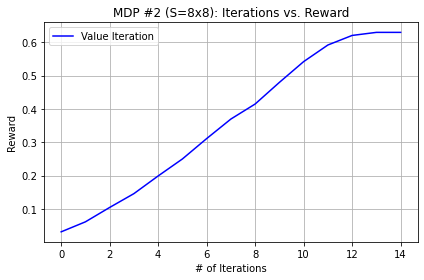

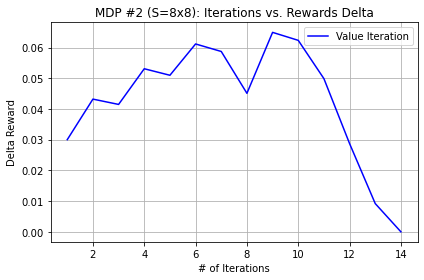

total time
[0.0009963512420654297, 0.0009963512420654297, 0.0009963512420654297, 0.001992940902709961, 0.001992940902709961, 0.001992940902709961, 0.001992940902709961, 0.0030138492584228516, 0.0030138492584228516, 0.0030138492584228516, 0.004022836685180664, 0.004022836685180664, 0.004022836685180664, 0.004983186721801758, 0.004983186721801758]


In [11]:
"""
Find iterations for convergence given gamma and epsilon

"""
# declare state-size
ss = '8x8'
vi = hiive.mdptoolbox.mdp.ValueIteration(P[ss], R[ss], gamma =.96, epsilon=0.01)
vi.setVerbose()
vi.run()
val = np.mean(vi.V)
ite = vi.iter
tim = vi.time
stats = vi.run_stats

iterlist = []
rewardlist = []
timelist = []

for i in range(0, len(stats)):
    iterlist.append(i)
    rewardlist.append(stats[i]['Mean V'])
    timelist.append(stats[i]['Time'])
print(iterlist)
print(rewardlist)
delta = np.diff(rewardlist)
print("rewards delta: ", delta)
delta_delta = np.diff(delta)

for ix in range(0, len(delta)):
    if abs(delta[ix]) < .05:
        print("index where delta converged: ", ix)
        break
    
# plot and show: Iterations vs. Reward given Gamma
plt.plot(iterlist, rewardlist, color="blue", label="Value Iteration")
plt.title("MDP #2 (S={}): Iterations vs. Reward".format(ss))
plt.xlabel("# of Iterations"), plt.ylabel("Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

# plot and show: Iterations vs. Delta given Gamma
plt.plot(iterlist[1:], delta, color="blue", label="Value Iteration")
plt.title("MDP #2 (S={}): Iterations vs. Rewards Delta".format(ss))
plt.xlabel("# of Iterations"), plt.ylabel("Delta Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

print("total time")
print(timelist)

*** 
## Policy Iteration
***

 Iteration   Variation
         1           2
         2           2
         3           2
         4           2
         5           1
         6           0
Iterating stopped, unchanging policy found.
[0, 1, 2, 3, 4, 5]
[0.0625, 0.125, 0.15625, 0.17578125, 0.18359375, 0.185546875]


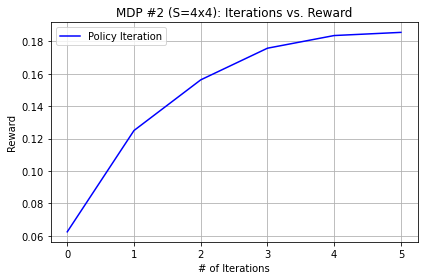

In [54]:
"""
Find iterations for convergence given gamma and epsilon

"""
# declare state-size
ss = '4x4'
pi = hiive.mdptoolbox.mdp.PolicyIteration(P[ss], R[ss], gamma =.5)
pi.setVerbose()
pi.run()
val = np.mean(pi.V)
ite = pi.iter
tim = pi.time
stats = pi.run_stats

iterlist = []
rewardlist = []
for i in range(0, len(stats)):
    iterlist.append(i)
    rewardlist.append(stats[i]['Mean V'])
print(iterlist)
print(rewardlist)
    
# plot and show: Iterations vs. Reward given Gamma
plt.plot(iterlist, rewardlist, color="blue", label="Policy Iteration")
plt.title("MDP #2 (S={}): Iterations vs. Reward".format(ss))
plt.xlabel("# of Iterations"), plt.ylabel("Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

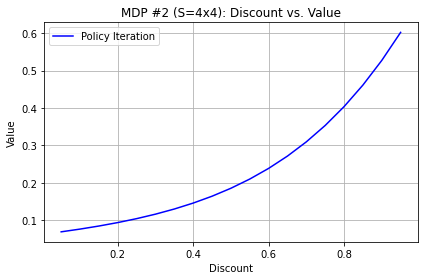

In [56]:
"""
Tune for gamma

"""

# declare state-size
ss = '4x4'
pi_discount[ss] = []
pi_epsilon[ss] = []
pi_value[ss] = []
pi_iterations[ss] = []
pi_time[ss] = []

for gamma in np.arange(0.05, 1, .05):
    pi = hiive.mdptoolbox.mdp.PolicyIteration(P[ss], R[ss], gamma=gamma)
    #pi.setVerbose()
    pi.run()
    val = np.mean(pi.V)
    ite = pi.iter
    tim = pi.time
    
    pi_discount[ss].append(gamma)
    pi_epsilon[ss].append(epsilon)
    pi_value[ss].append(val)
    pi_iterations[ss].append(ite)
    pi_time[ss].append(tim)
    
#     print("discount rate: ", gamma)
#     print("iterations: ", ite)
#     print("wall-clock time: ", tim)
#     print()
#     print("policy: " , pi.policy)
    
# plot and show: Gamma vs. Value
plt.plot(pi_discount[ss], pi_value[ss], color="blue", label="Policy Iteration")
plt.title("MDP #2 (S={}): Discount vs. Value".format(ss))
plt.xlabel("Discount"), plt.ylabel("Value"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

 Iteration   Variation
         1           2
         2           2
         3           2
         4           2
         5           1
         6           0
Iterating stopped, unchanging policy found.
 Iteration   Variation
         1           2
         2           2
         3           2
         4           2
         5           1
         6           0
Iterating stopped, unchanging policy found.
 Iteration   Variation
         1           2
         2           2
         3           2
         4           2
         5           1
         6           0
Iterating stopped, unchanging policy found.
 Iteration   Variation
         1           2
         2           2
         3           2
         4           2
         5           1
         6           0
Iterating stopped, unchanging policy found.
 Iteration   Variation
         1           2
         2           2
         3           2
         4           2
         5           1
         6           0
Iterating stopped, 

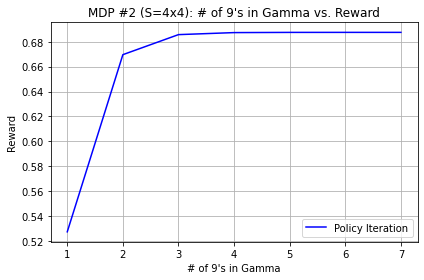

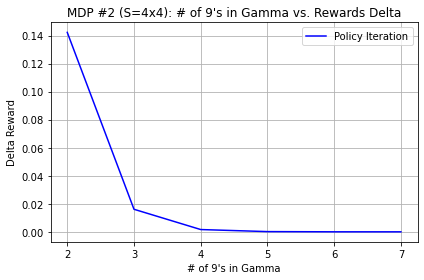

In [79]:
"""
Find iterations for convergence given gamma

"""
iterlist = []
rewardlist = []
ss = '4x4'
for gamma in [0.9, 0.99, 0.999, 0.9999, 0.99999, 0.999999, 0.9999999]:
    pi = hiive.mdptoolbox.mdp.PolicyIteration(P[ss], R[ss], gamma = gamma)
    pi.setVerbose()
    pi.run()
    val = np.mean(pi.V)
    rewardlist.append(val)

delta = np.diff(rewardlist)
for ix in range(0, len(delta)):
    if abs(delta[ix]) < .05:
        print("index where delta converged: ", ix)
        break

print("list of rewards: ", rewardlist)
    
# plot and show: Iterations vs. Reward given Gamma
plt.plot([1, 2, 3, 4, 5, 6, 7], rewardlist, color="blue", label="Policy Iteration")
plt.title("MDP #2 (S={}): # of 9's in Gamma vs. Reward".format(ss))
plt.xlabel("# of 9's in Gamma"), plt.ylabel("Reward"), plt.legend(loc="best")
plt.ticklabel_format()
plt.tight_layout()
plt.grid()
plt.show()


# plot and show: Iterations vs. Delta given Gamma
plt.plot([2, 3, 4, 5, 6, 7], delta, color="blue", label="Policy Iteration")
plt.title("MDP #2 (S={}): # of 9's in Gamma vs. Rewards Delta".format(ss))
plt.xlabel("# of 9's in Gamma"), plt.ylabel("Delta Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

 Iteration   Variation
         1           2
         2           2
         3           2
         4           2
         5           1
         6           0
Iterating stopped, unchanging policy found.
[0, 1, 2, 3, 4, 5]
[0.0625, 0.18749875, 0.31249625001250003, 0.49999000008749966, 0.6249850001624992, 0.6874818752249987]
rewards delta:  [0.12499875 0.1249975  0.18749375 0.124995   0.06249688]
index where delta converged:  0


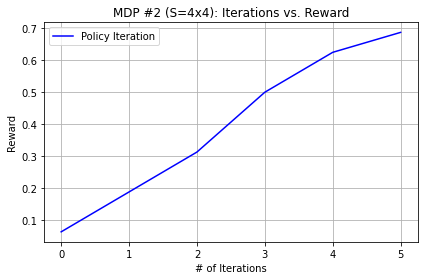

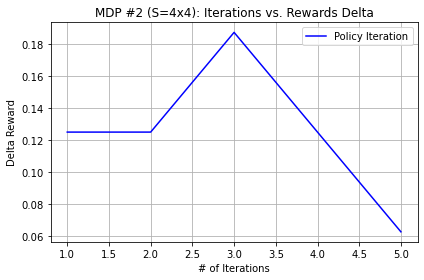

In [82]:
"""
Find iterations for convergence given gamma

"""
# declare state-size
ss = '4x4'
pi = hiive.mdptoolbox.mdp.PolicyIteration(P[ss], R[ss], gamma =.99999)
pi.setVerbose()
pi.run()
val = np.mean(pi.V)
ite = pi.iter
tim = pi.time
stats = pi.run_stats

iterlist = []
rewardlist = []

for i in range(0, len(stats)):
    iterlist.append(i)
    rewardlist.append(stats[i]['Mean V'])
print(iterlist)
print(rewardlist)
delta = np.diff(rewardlist)
print("rewards delta: ", delta)
delta_delta = np.diff(delta)

for ix in range(0, len(delta_delta)):
    if abs(delta_delta[ix]) < .05:
        print("index where delta converged: ", ix)
        break
    
# plot and show: Iterations vs. Reward given Gamma
plt.plot(iterlist, rewardlist, color="blue", label="Policy Iteration")
plt.title("MDP #2 (S={}): Iterations vs. Reward".format(ss))
plt.xlabel("# of Iterations"), plt.ylabel("Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

# plot and show: Iterations vs. Delta given Gamma
plt.plot(iterlist[1:], delta, color="blue", label="Policy Iteration")
plt.title("MDP #2 (S={}): Iterations vs. Rewards Delta".format(ss))
plt.xlabel("# of Iterations"), plt.ylabel("Delta Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

#  Iteration   Variation
#          1    1.000000
#          2    0.960000
#          3    0.921600
#          4    0.884736
#          5    0.849347
#          6    0.815373
#          7    0.000000
# Iterating stopped, epsilon-optimal policy found.
# [0, 1, 2, 3, 4, 5, 6]
# [0.0625, 0.1825, 0.29769999999999996, 0.408292, 0.56754448, 0.6185052736, 0.6185052736]
# rewards delta:  [0.12       0.1152     0.110592   0.15925248 0.05096079 0.        ]
# index where delta converged:  5

 Iteration   Variation
         1           2
         2           2
         3           2
         4           2
         5           1
         6           0
Iterating stopped, unchanging policy found.
[0, 1, 2, 3, 4, 5]
[0.0625, 0.18749875, 0.31249625001250003, 0.49999000008749966, 0.6249850001624992, 0.6874818752249987]
rewards delta:  [0.12499875 0.1249975  0.18749375 0.124995   0.06249688]
index where delta converged:  0


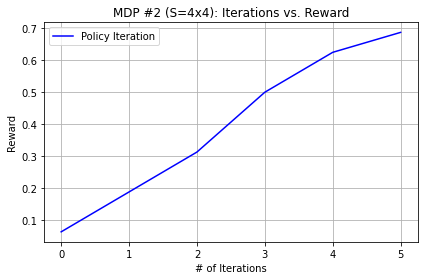

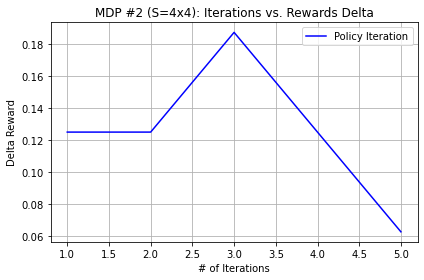

total time
[0.0009665489196777344, 0.0019631385803222656, 0.002959728240966797, 0.002959728240966797, 0.002959728240966797, 0.003980398178100586]


In [13]:
"""
Find iterations for convergence given gamma

"""
# declare state-size
ss = '4x4'
pi = hiive.mdptoolbox.mdp.PolicyIteration(P[ss], R[ss], gamma =.99999)
pi.setVerbose()
pi.run()
val = np.mean(pi.V)
ite = pi.iter
tim = pi.time
stats = pi.run_stats

iterlist = []
rewardlist = []
timelist = []

for i in range(0, len(stats)):
    iterlist.append(i)
    rewardlist.append(stats[i]['Mean V'])
    timelist.append(stats[i]['Time'])
print(iterlist)
print(rewardlist)
delta = np.diff(rewardlist)
print("rewards delta: ", delta)
delta_delta = np.diff(delta)

for ix in range(0, len(delta_delta)):
    if abs(delta_delta[ix]) < .05:
        print("index where delta converged: ", ix)
        break
    
# plot and show: Iterations vs. Reward given Gamma
plt.plot(iterlist, rewardlist, color="blue", label="Policy Iteration")
plt.title("MDP #2 (S={}): Iterations vs. Reward".format(ss))
plt.xlabel("# of Iterations"), plt.ylabel("Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

# plot and show: Iterations vs. Delta given Gamma
plt.plot(iterlist[1:], delta, color="blue", label="Policy Iteration")
plt.title("MDP #2 (S={}): Iterations vs. Rewards Delta".format(ss))
plt.xlabel("# of Iterations"), plt.ylabel("Delta Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

#  Iteration   Variation
#          1    1.000000
#          2    0.960000
#          3    0.921600
#          4    0.884736
#          5    0.849347
#          6    0.815373
#          7    0.000000
# Iterating stopped, epsilon-optimal policy found.
# [0, 1, 2, 3, 4, 5, 6]
# [0.0625, 0.1825, 0.29769999999999996, 0.408292, 0.56754448, 0.6185052736, 0.6185052736]
# rewards delta:  [0.12       0.1152     0.110592   0.15925248 0.05096079 0.        ]
# index where delta converged:  5

print("total time")
print(timelist)


 Iteration   Variation
         1           2
         2           2
         3           2
         4           2
         5           1
         6           0
Iterating stopped, unchanging policy found.
[0, 1, 2, 3, 4, 5]
[0.0625, 0.18749875, 0.31249625001250003, 0.49999000008749966, 0.6249850001624992, 0.6874818752249987]
rewards delta:  [0.12499875 0.1249975  0.18749375 0.124995   0.06249688]
index where delta converged:  0


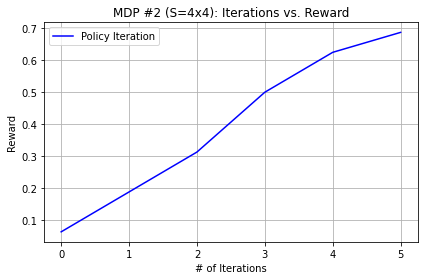

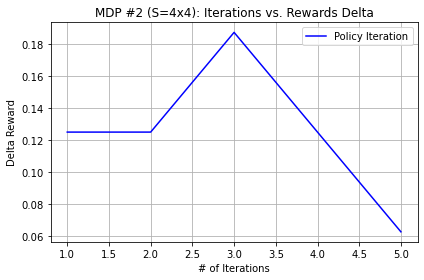

total time
[0.0010216236114501953, 0.0010216236114501953, 0.0019927024841308594, 0.0029900074005126953, 0.0029900074005126953, 0.0039882659912109375]


In [48]:
"""
Find iterations for convergence given gamma

"""
# declare state-size
ss = '4x4'
pi = hiive.mdptoolbox.mdp.PolicyIteration(P[ss], R[ss], gamma =.99999)
pi.setVerbose()
pi.run()
val = np.mean(pi.V)
ite = pi.iter
tim = pi.time
stats = pi.run_stats
policy = pi.policy

iterlist = []
rewardlist = []
timelist = []

for i in range(0, len(stats)):
    iterlist.append(i)
    rewardlist.append(stats[i]['Mean V'])
    timelist.append(stats[i]['Time'])
print(iterlist)
print(rewardlist)
delta = np.diff(rewardlist)
print("rewards delta: ", delta)
delta_delta = np.diff(delta)

for ix in range(0, len(delta_delta)):
    if abs(delta_delta[ix]) < .05:
        print("index where delta converged: ", ix)
        break
    
# plot and show: Iterations vs. Reward given Gamma
plt.plot(iterlist, rewardlist, color="blue", label="Policy Iteration")
plt.title("MDP #2 (S={}): Iterations vs. Reward".format(ss))
plt.xlabel("# of Iterations"), plt.ylabel("Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

# plot and show: Iterations vs. Delta given Gamma
plt.plot(iterlist[1:], delta, color="blue", label="Policy Iteration")
plt.title("MDP #2 (S={}): Iterations vs. Rewards Delta".format(ss))
plt.xlabel("# of Iterations"), plt.ylabel("Delta Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

#  Iteration   Variation
#          1    1.000000
#          2    0.960000
#          3    0.921600
#          4    0.884736
#          5    0.849347
#          6    0.815373
#          7    0.000000
# Iterating stopped, epsilon-optimal policy found.
# [0, 1, 2, 3, 4, 5, 6]
# [0.0625, 0.1825, 0.29769999999999996, 0.408292, 0.56754448, 0.6185052736, 0.6185052736]
# rewards delta:  [0.12       0.1152     0.110592   0.15925248 0.05096079 0.        ]
# index where delta converged:  5

print("total time")
print(timelist)


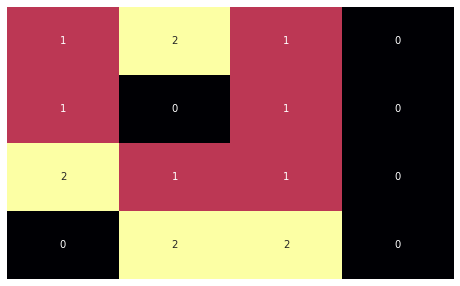

In [49]:
def plot_policy(policy, x, y):
    plt.figure(figsize=(8, 5))
    policy_2d = np.array(list(policy)).reshape(x, y)
    ax = sns.heatmap(policy_2d, cmap='inferno', annot=True, yticklabels=False, xticklabels=False, cbar=False)
    plt.show()
    
plot_policy(policy, 4, 4)

 Iteration   Variation
         1           2
         2           3
         3           3
         4           4
         5           4
         6           5
         7           5
         8           4
         9           6
        10           6
        11           5
        12           3
        13           1
        14           0
Iterating stopped, unchanging policy found.
 Iteration   Variation
         1           2
         2           3
         3           3
         4           4
         5           4
         6           5
         7           5
         8           4
         9           6
        10           6
        11           5
        12           3
        13           1
        14           0
Iterating stopped, unchanging policy found.
 Iteration   Variation
         1           2
         2           3
         3           3
         4           4
         5           4
         6           5
         7           5
         8           4
         9     

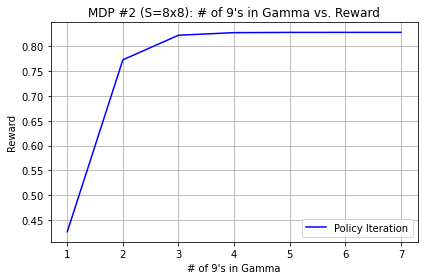

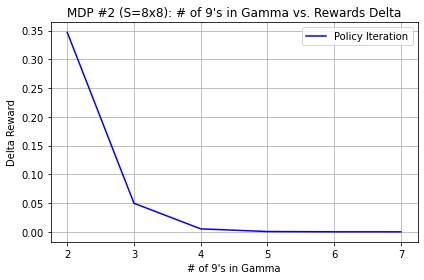

In [81]:
"""
Find iterations for convergence given gamma

"""
iterlist = []
rewardlist = []
ss = '8x8'
for gamma in [0.9, 0.99, 0.999, 0.9999, 0.99999, 0.999999, 0.9999999]:
    pi = hiive.mdptoolbox.mdp.PolicyIteration(P[ss], R[ss], gamma = gamma)
    pi.setVerbose()
    pi.run()
    val = np.mean(pi.V)
    rewardlist.append(val)

delta = np.diff(rewardlist)
for ix in range(0, len(delta)):
    if abs(delta[ix]) < .05:
        print("index where delta converged: ", ix)
        break

print("list of rewards: ", rewardlist)
    
# plot and show: Iterations vs. Reward given Gamma
plt.plot([1, 2, 3, 4, 5, 6, 7], rewardlist, color="blue", label="Policy Iteration")
plt.title("MDP #2 (S={}): # of 9's in Gamma vs. Reward".format(ss))
plt.xlabel("# of 9's in Gamma"), plt.ylabel("Reward"), plt.legend(loc="best")
plt.ticklabel_format()
plt.tight_layout()
plt.grid()
plt.show()


# plot and show: Iterations vs. Delta given Gamma
plt.plot([2, 3, 4, 5, 6, 7], delta, color="blue", label="Policy Iteration")
plt.title("MDP #2 (S={}): # of 9's in Gamma vs. Rewards Delta".format(ss))
plt.xlabel("# of 9's in Gamma"), plt.ylabel("Delta Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

 Iteration   Variation
         1           2
         2           3
         3           3
         4           4
         5           4
         6           5
         7           5
         8           4
         9           6
        10           6
        11           5
        12           3
        13           1
        14           0
Iterating stopped, unchanging policy found.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[0.03125, 0.0624996875, 0.1093737500046875, 0.15624734376874996, 0.21874484380624973, 0.28124171886874916, 0.3593620314859351, 0.4374815628999949, 0.49997656307499144, 0.5937181259124835, 0.6874587513343473, 0.765575158014022, 0.8124445333233867, 0.8280675021952573]
rewards delta:  [0.03124969 0.04687406 0.04687359 0.0624975  0.06249688 0.07812031
 0.07811953 0.062495   0.09374156 0.09374063 0.07811641 0.04686938
 0.01562297]
index where delta converged:  0


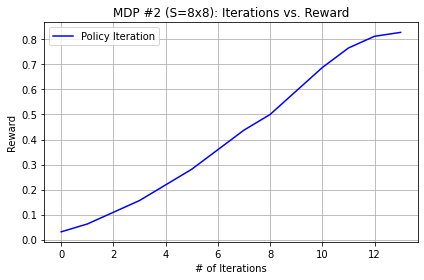

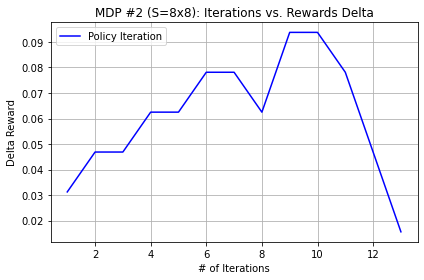

In [83]:
"""
Find iterations for convergence given gamma

"""
# declare state-size
ss = '8x8'
pi = hiive.mdptoolbox.mdp.PolicyIteration(P[ss], R[ss], gamma =.99999)
pi.setVerbose()
pi.run()
val = np.mean(pi.V)
ite = pi.iter
tim = pi.time
stats = pi.run_stats

iterlist = []
rewardlist = []

for i in range(0, len(stats)):
    iterlist.append(i)
    rewardlist.append(stats[i]['Mean V'])
print(iterlist)
print(rewardlist)
delta = np.diff(rewardlist)
print("rewards delta: ", delta)
delta_delta = np.diff(delta)

for ix in range(0, len(delta_delta)):
    if abs(delta_delta[ix]) < .05:
        print("index where delta converged: ", ix)
        break
    
# plot and show: Iterations vs. Reward given Gamma
plt.plot(iterlist, rewardlist, color="blue", label="Policy Iteration")
plt.title("MDP #2 (S={}): Iterations vs. Reward".format(ss))
plt.xlabel("# of Iterations"), plt.ylabel("Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

# plot and show: Iterations vs. Delta given Gamma
plt.plot(iterlist[1:], delta, color="blue", label="Policy Iteration")
plt.title("MDP #2 (S={}): Iterations vs. Rewards Delta".format(ss))
plt.xlabel("# of Iterations"), plt.ylabel("Delta Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

#  Iteration   Variation
#          1    1.000000
#          2    0.960000
#          3    0.921600
#          4    0.884736
#          5    0.849347
#          6    0.815373
#          7    0.000000
# Iterating stopped, epsilon-optimal policy found.
# [0, 1, 2, 3, 4, 5, 6]
# [0.0625, 0.1825, 0.29769999999999996, 0.408292, 0.56754448, 0.6185052736, 0.6185052736]
# rewards delta:  [0.12       0.1152     0.110592   0.15925248 0.05096079 0.        ]
# index where delta converged:  5

 Iteration   Variation
         1           2
         2           3
         3           3
         4           4
         5           4
         6           5
         7           5
         8           4
         9           6
        10           6
        11           5
        12           3
        13           1
        14           0
Iterating stopped, unchanging policy found.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[0.03125, 0.0624996875, 0.1093737500046875, 0.15624734376874996, 0.21874484380624973, 0.28124171886874916, 0.3593620314859351, 0.4374815628999949, 0.49997656307499144, 0.5937181259124835, 0.6874587513343473, 0.765575158014022, 0.8124445333233867, 0.8280675021952573]
rewards delta:  [0.03124969 0.04687406 0.04687359 0.0624975  0.06249688 0.07812031
 0.07811953 0.062495   0.09374156 0.09374063 0.07811641 0.04686938
 0.01562297]
index where delta converged:  0


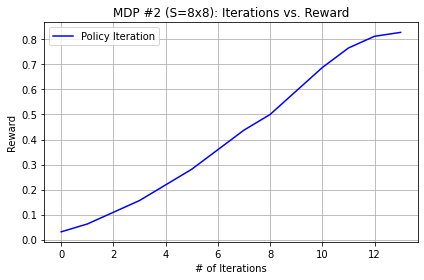

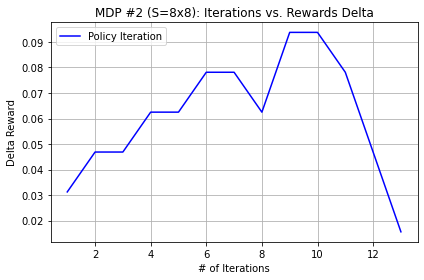

total time
[0.0009965896606445312, 0.001992940902709961, 0.0029897689819335938, 0.0029897689819335938, 0.0039861202239990234, 0.0039861202239990234, 0.0049839019775390625, 0.005980014801025391, 0.005980014801025391, 0.00700831413269043, 0.00700831413269043, 0.007973194122314453, 0.007973194122314453, 0.007973194122314453]


In [12]:
"""
Find iterations for convergence given gamma

"""
# declare state-size
ss = '8x8'
pi = hiive.mdptoolbox.mdp.PolicyIteration(P[ss], R[ss], gamma =.99999)
pi.setVerbose()
pi.run()
val = np.mean(pi.V)
ite = pi.iter
tim = pi.time
stats = pi.run_stats

iterlist = []
rewardlist = []
timelist = []

for i in range(0, len(stats)):
    iterlist.append(i)
    rewardlist.append(stats[i]['Mean V'])
    timelist.append(stats[i]['Time'])
print(iterlist)
print(rewardlist)
delta = np.diff(rewardlist)
print("rewards delta: ", delta)
delta_delta = np.diff(delta)

for ix in range(0, len(delta_delta)):
    if abs(delta_delta[ix]) < .05:
        print("index where delta converged: ", ix)
        break
    
# plot and show: Iterations vs. Reward given Gamma
plt.plot(iterlist, rewardlist, color="blue", label="Policy Iteration")
plt.title("MDP #2 (S={}): Iterations vs. Reward".format(ss))
plt.xlabel("# of Iterations"), plt.ylabel("Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

# plot and show: Iterations vs. Delta given Gamma
plt.plot(iterlist[1:], delta, color="blue", label="Policy Iteration")
plt.title("MDP #2 (S={}): Iterations vs. Rewards Delta".format(ss))
plt.xlabel("# of Iterations"), plt.ylabel("Delta Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

#  Iteration   Variation
#          1    1.000000
#          2    0.960000
#          3    0.921600
#          4    0.884736
#          5    0.849347
#          6    0.815373
#          7    0.000000
# Iterating stopped, epsilon-optimal policy found.
# [0, 1, 2, 3, 4, 5, 6]
# [0.0625, 0.1825, 0.29769999999999996, 0.408292, 0.56754448, 0.6185052736, 0.6185052736]
# rewards delta:  [0.12       0.1152     0.110592   0.15925248 0.05096079 0.        ]
# index where delta converged:  5

print("total time")
print(timelist)

*** 
## Q-Learning
***

stats:  [{'State': 13, 'Action': 3, 'Reward': 0.0, 'Error': 0.0, 'Time': 0.0, 'Alpha': 0.1, 'Epsilon': 1.0, 'Gamma': 0.5, 'V[0]': 0.0, 'Max V': 0.0, 'Mean V': 0.0, 'Iteration': 1}, {'State': 9, 'Action': 0, 'Reward': 0.0, 'Error': 0.0, 'Time': 0.0, 'Alpha': 0.099, 'Epsilon': 0.99, 'Gamma': 0.5, 'V[0]': 0.0, 'Max V': 0.0, 'Mean V': 0.0, 'Iteration': 2}, {'State': 8, 'Action': 1, 'Reward': 0.0, 'Error': 0.0, 'Time': 0.0, 'Alpha': 0.09801, 'Epsilon': 0.9801, 'Gamma': 0.5, 'V[0]': 0.0, 'Max V': 0.0, 'Mean V': 0.0, 'Iteration': 3}, {'State': 12, 'Action': 3, 'Reward': 0.0, 'Error': 0.0, 'Time': 0.0, 'Alpha': 0.0970299, 'Epsilon': 0.9702989999999999, 'Gamma': 0.5, 'V[0]': 0.0, 'Max V': 0.0, 'Mean V': 0.0, 'Iteration': 4}, {'State': 12, 'Action': 2, 'Reward': 0.0, 'Error': 0.0, 'Time': 0.0, 'Alpha': 0.096059601, 'Epsilon': 0.96059601, 'Gamma': 0.5, 'V[0]': 0.0, 'Max V': 0.0, 'Mean V': 0.0, 'Iteration': 5}, {'State': 12, 'Action': 2, 'Reward': 0.0, 'Error': 0.0, 'Time': 0.0, 'Alpha': 0.0950990

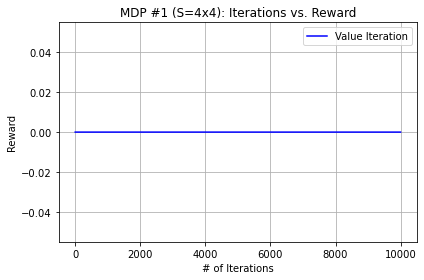

In [95]:
"""
Find iterations for convergence given gamma and epsilon

"""
# declare state-size
ss = '4x4'
ql = hiive.mdptoolbox.mdp.QLearning(P[ss], R[ss], gamma =.5, epsilon=1.0)
ql.setVerbose()
ql.run()
val = np.mean(ql.V)
tim = ql.time
stats = ql.run_stats

print("stats: ", stats)

iterlist = []
rewardlist = []
for i in range(0, len(stats)):
    iterlist.append(i)
    rewardlist.append(stats[i]['Mean V'])
print(iterlist)
print(rewardlist)
    
# plot and show: Iterations vs. Reward given Gamma
plt.plot(iterlist, rewardlist, color="blue", label="Value Iteration")
plt.title("MDP #1 (S={}): Iterations vs. Reward".format(ss))
plt.xlabel("# of Iterations"), plt.ylabel("Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

[0.0, 0.0066425707167824324, 0.0, 0.0, 0.0, 0.0, 6.25e-05, 0.0, 0.0, 0.00651222954003221, 0.0001249375, 0.0001249375, 0.0, 0.0, 0.0004989545609388898, 0.00683134970145684, 0.0, 0.0, 0.0]


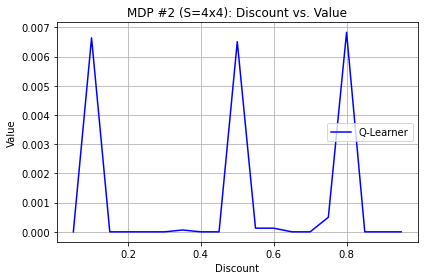

In [97]:
"""
Tune for gamma holding epsilon constant

"""

# declare state-size
ss = '4x4'
ql_discount[ss] = []
ql_epsilon[ss] = []
ql_value[ss] = []
ql_iterations[ss] = []
ql_time[ss] = []

for gamma in np.arange(0.05, 1, .05):
    ql = hiive.mdptoolbox.mdp.QLearning(P[ss], R[ss], gamma=gamma)
    #ql.setVerbose()
    ql.run()
    val = np.mean(ql.V)
    #ite = ql.iter
    tim = ql.time
    
    ql_discount[ss].append(gamma)
    ql_epsilon[ss].append(epsilon)
    ql_value[ss].append(val)
    #ql_iterations[ss].append(ite)
    ql_time[ss].append(tim)
    
#     print("discount rate: ", gamma)
#     print("iterations: ", ite)
#     print("wall-clock time: ", tim)
#     print()
#     print("policy: " , ql.policy)

print(ql_value[ss])
    
# plot and show: Gamma vs. Value
plt.plot(ql_discount[ss], ql_value[ss], color="blue", label="Q-Learner")
plt.title("MDP #2 (S={}): Discount vs. Value".format(ss))
plt.xlabel("Discount"), plt.ylabel("Value"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

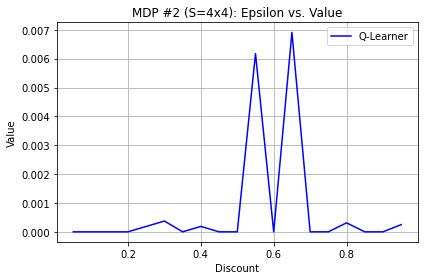

In [98]:
"""
Tune for epsilon holding gamma constant

"""

# declare state-size
ss = '4x4'
ql_discount[ss] = []
ql_epsilon[ss] = []
ql_value[ss] = []
ql_iterations[ss] = []
ql_time[ss] = []

gamma=0.8
for epsilon in np.arange(0.05, 1, .05):
    ql = hiive.mdptoolbox.mdp.QLearning(P[ss], R[ss], gamma=gamma)
    #ql.setVerbose()
    ql.run()
    val = np.mean(ql.V)
    tim = ql.time
    
    ql_discount[ss].append(gamma)
    ql_epsilon[ss].append(epsilon)
    ql_value[ss].append(val)
    ql_time[ss].append(tim)
    

# plot and show: Gamma vs. Value
plt.plot(ql_epsilon[ss], ql_value[ss], color="blue", label="Q-Learner")
plt.title("MDP #2 (S={}): Epsilon vs. Value".format(ss))
plt.xlabel("Epsilon"), plt.ylabel("Value"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

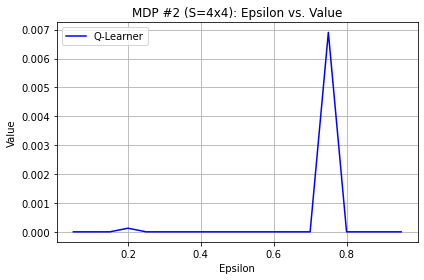

In [125]:
"""
Tune for epsilon holding gamma constant

"""

# declare state-size
ss = '4x4'
ql_discount[ss] = []
ql_epsilon[ss] = []
ql_value[ss] = []
ql_iterations[ss] = []
ql_time[ss] = []

gamma=0.8
for epsilon in np.arange(0.05, 1, .05):
    ql = hiive.mdptoolbox.mdp.QLearning(P[ss], R[ss], gamma=gamma)
    #ql.setVerbose()
    ql.run()
    val = np.mean(ql.V)
    tim = ql.time
    
    ql_discount[ss].append(gamma)
    ql_epsilon[ss].append(epsilon)
    ql_value[ss].append(val)
    ql_time[ss].append(tim)
    

# plot and show: Gamma vs. Value
plt.plot(ql_epsilon[ss], ql_value[ss], color="blue", label="Q-Learner")
plt.title("MDP #2 (S={}): Epsilon vs. Value".format(ss))
plt.xlabel("Epsilon"), plt.ylabel("Value"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

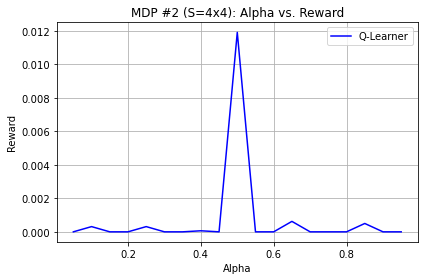

In [100]:
"""
Tune for alpha holding gamma and epsilon constant

"""

# declare state-size
ss = '4x4'
ql_discount[ss] = []
ql_epsilon[ss] = []
ql_value[ss] = []
ql_iterations[ss] = []
ql_time[ss] = []
ql_alpha[ss] = []

gamma=0.8
epsilon=0.65
for alpha in np.arange(0.05, 1, .05):
    ql = hiive.mdptoolbox.mdp.QLearning(P[ss], R[ss], gamma=gamma, epsilon=epsilon, alpha=alpha)
    #ql.setVerbose()
    ql.run()
    val = np.mean(ql.V)
    tim = ql.time
    
    ql_discount[ss].append(gamma)
    ql_epsilon[ss].append(epsilon)
    ql_value[ss].append(val)
    ql_time[ss].append(tim)
    ql_alpha[ss].append(alpha)
    

# plot and show: Gamma vs. Value
plt.plot(ql_alpha[ss], ql_value[ss], color="blue", label="Q-Learner")
plt.title("MDP #2 (S={}): Alpha vs. Reward".format(ss))
plt.xlabel("Alpha"), plt.ylabel("Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

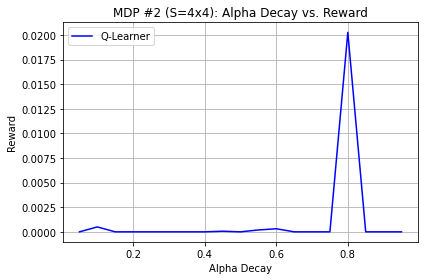

In [104]:
"""
Tune for alpha decay

"""

# declare state-size
ss = '4x4'
ql_discount[ss] = []
ql_epsilon[ss] = []
ql_value[ss] = []
ql_iterations[ss] = []
ql_time[ss] = []
ql_alpha[ss] = []
ql_alpha_d[ss] = []

gamma=0.8
epsilon=0.65
alpha=0.5
for alpha_d in np.arange(0.05, 1, .05):
    ql = hiive.mdptoolbox.mdp.QLearning(P[ss], R[ss], gamma=gamma, epsilon=epsilon, alpha=alpha, alpha_decay=alpha_d)
    #ql.setVerbose()
    ql.run()
    val = np.mean(ql.V)
    tim = ql.time
    
    ql_discount[ss].append(gamma)
    ql_epsilon[ss].append(epsilon)
    ql_value[ss].append(val)
    ql_time[ss].append(tim)
    ql_alpha[ss].append(alpha)
    ql_alpha_d[ss].append(alpha_d)
    

# plot and show: Gamma vs. Value
plt.plot(ql_alpha_d[ss], ql_value[ss], color="blue", label="Q-Learner")
plt.title("MDP #2 (S={}): Alpha Decay vs. Reward".format(ss))
plt.xlabel("Alpha Decay"), plt.ylabel("Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

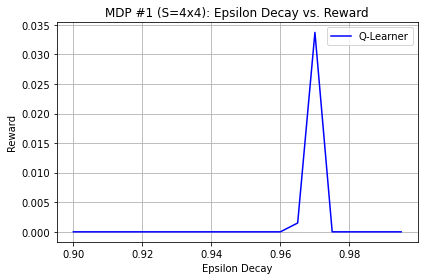

In [106]:
"""
Tune for epsilon decay

"""

# declare state-size
ss = '4x4'
ql_discount[ss] = []
ql_epsilon[ss] = []
ql_value[ss] = []
ql_iterations[ss] = []
ql_time[ss] = []
ql_alpha[ss] = []
ql_alpha_d[ss] = []
ql_epsilon_d[ss] = []

gamma=0.8
epsilon=0.65
alpha=0.5
alpha_d = 0.8
for epsilon_d in np.arange(0.900, .999, .005):
    ql = hiive.mdptoolbox.mdp.QLearning(P[ss], R[ss], gamma=gamma, epsilon=epsilon, alpha=alpha, alpha_decay=alpha_d, epsilon_decay=epsilon_d)
    #ql.setVerbose()
    ql.run()
    val = np.mean(ql.V)
    tim = ql.time
    
    ql_discount[ss].append(gamma)
    ql_epsilon[ss].append(epsilon)
    ql_value[ss].append(val)
    ql_time[ss].append(tim)
    ql_alpha[ss].append(alpha)
    ql_alpha_d[ss].append(alpha_d)
    ql_epsilon_d[ss].append(epsilon_d)
    

# plot and show: Gamma vs. Value
plt.plot(ql_epsilon_d[ss], ql_value[ss], color="blue", label="Q-Learner")
plt.title("MDP #2 (S={}): Epsilon Decay vs. Reward".format(ss))
plt.xlabel("Epsilon Decay"), plt.ylabel("Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

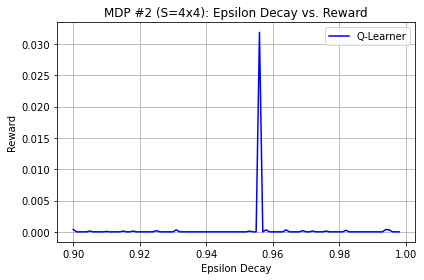

In [112]:
"""
Tune for epsilon decay

"""

# declare state-size
ss = '4x4'
ql_discount[ss] = []
ql_epsilon[ss] = []
ql_value[ss] = []
ql_iterations[ss] = []
ql_time[ss] = []
ql_alpha[ss] = []
ql_alpha_d[ss] = []
ql_epsilon_d[ss] = []

gamma=0.8
epsilon=0.65
alpha=0.5
alpha_d = 0.8
for epsilon_d in np.arange(0.900, .999, .001):
    ql = hiive.mdptoolbox.mdp.QLearning(P[ss], R[ss], gamma=gamma, epsilon=epsilon, alpha=alpha, alpha_decay=alpha_d, epsilon_decay=epsilon_d)
    #ql.setVerbose()
    ql.run()
    val = np.mean(ql.V)
    tim = ql.time
    
    ql_discount[ss].append(gamma)
    ql_epsilon[ss].append(epsilon)
    ql_value[ss].append(val)
    ql_time[ss].append(tim)
    ql_alpha[ss].append(alpha)
    ql_alpha_d[ss].append(alpha_d)
    ql_epsilon_d[ss].append(epsilon_d)
    

# plot and show: Gamma vs. Value
plt.plot(ql_epsilon_d[ss], ql_value[ss], color="blue", label="Q-Learner")
plt.title("MDP #2 (S={}): Epsilon Decay vs. Reward".format(ss))
plt.xlabel("Epsilon Decay"), plt.ylabel("Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

In [116]:
ql_value['4x4']

[0.00037406374906287493,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0001249375,
 0.0,
 0.0,
 0.0,
 0.0,
 6.25e-05,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0001249375,
 0.0,
 0.0,
 0.0001249375,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0001873125625,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0003118756246875625,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0001249375,
 0.0,
 0.0,
 0.03186018770969869,
 0.0,
 0.0003118756246875625,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0003118756246875625,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0001873125625,
 0.0,
 0.0,
 0.0001249375,
 0.0,
 0.0,
 0.0,
 0.0001249375,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0002496252499375,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.00037406374906287493,
 0.0003118756246875625,
 0.0,
 0.0,
 0.0]

In [118]:
ql_value['4x4'][56]

0.03186018770969869

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

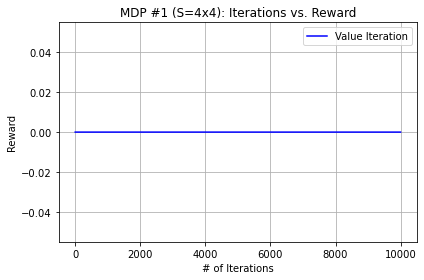

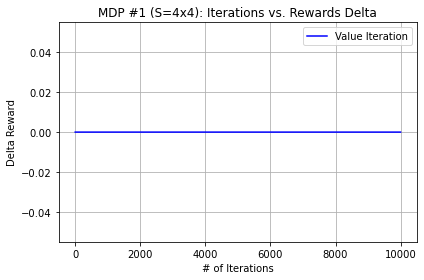

In [121]:
"""
Find iterations for convergence given gamma and epsilon

"""

gamma=0.8
epsilon=0.65
alpha=0.5
alpha_d = 0.8
epsilon_d = 0.956
# declare state-size
ss = '4x4'
ql = hiive.mdptoolbox.mdp.QLearning(P[ss], R[ss], gamma=gamma, epsilon=epsilon, alpha=alpha, alpha_decay=alpha_d, epsilon_decay=epsilon_d)
ql.setVerbose()
ql.run()
val = np.mean(ql.V)
tim = ql.time
stats = ql.run_stats

# print("stats: ", stats)

iterlist = []
rewardlist = []
# for i in range(0, len(stats)):
#     iterlist.append(i)
#     rewardlist.append(stats[i]['Mean V'])
# print(iterlist)
# print(rewardlist)
    
# # plot and show: Iterations vs. Reward given Gamma
# plt.plot(iterlist, rewardlist, color="blue", label="Value Iteration")
# plt.title("MDP #1 (S={}): Iterations vs. Reward".format(ss))
# plt.xlabel("# of Iterations"), plt.ylabel("Reward"), plt.legend(loc="best")
# plt.tight_layout()
# plt.grid()
# plt.show()

for i in range(0, len(stats)):
    iterlist.append(i)
    rewardlist.append(stats[i]['Mean V'])
print(iterlist)
print(rewardlist)
delta = np.diff(rewardlist)
print("rewards delta: ", delta)
delta_delta = np.diff(delta)

for ix in range(0, len(delta_delta)):
    if abs(delta_delta[ix]) < .0001 and delta_delta[ix] > 0:
        print("index where delta converged: ", ix)
        break
    
# plot and show: Iterations vs. Reward given Gamma
plt.plot(iterlist, rewardlist, color="blue", label="Value Iteration")
plt.title("MDP #1 (S={}): Iterations vs. Reward".format(ss))
plt.xlabel("# of Iterations"), plt.ylabel("Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

# plot and show: Iterations vs. Delta given Gamma
plt.plot(iterlist[1:], delta, color="blue", label="Value Iteration")
plt.title("MDP #1 (S={}): Iterations vs. Rewards Delta".format(ss))
plt.xlabel("# of Iterations"), plt.ylabel("Delta Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

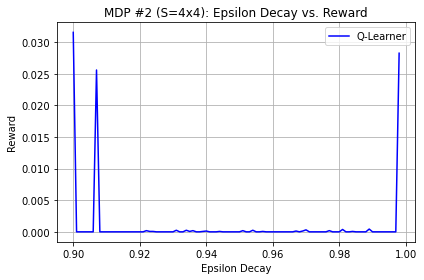

In [122]:
"""
Tune for epsilon decay

"""

# declare state-size
ss = '4x4'
ql_discount[ss] = []
ql_epsilon[ss] = []
ql_value[ss] = []
ql_iterations[ss] = []
ql_time[ss] = []
ql_alpha[ss] = []
ql_alpha_d[ss] = []
ql_epsilon_d[ss] = []

gamma=0.999
epsilon=0.65
alpha=0.5
alpha_d = 0.9
for epsilon_d in np.arange(0.900, .999, .001):
    ql = hiive.mdptoolbox.mdp.QLearning(P[ss], R[ss], gamma=gamma, epsilon=epsilon, alpha=alpha, alpha_decay=alpha_d, epsilon_decay=epsilon_d)
    #ql.setVerbose()
    ql.run()
    val = np.mean(ql.V)
    tim = ql.time
    
    ql_discount[ss].append(gamma)
    ql_epsilon[ss].append(epsilon)
    ql_value[ss].append(val)
    ql_time[ss].append(tim)
    ql_alpha[ss].append(alpha)
    ql_alpha_d[ss].append(alpha_d)
    ql_epsilon_d[ss].append(epsilon_d)
    

# plot and show: Gamma vs. Value
plt.plot(ql_epsilon_d[ss], ql_value[ss], color="blue", label="Q-Learner")
plt.title("MDP #2 (S={}): Epsilon Decay vs. Reward".format(ss))
plt.xlabel("Epsilon Decay"), plt.ylabel("Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

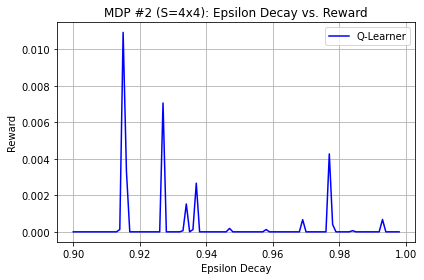

In [123]:
"""
Tune for epsilon decay

"""

# declare state-size
ss = '4x4'
ql_discount[ss] = []
ql_epsilon[ss] = []
ql_value[ss] = []
ql_iterations[ss] = []
ql_time[ss] = []
ql_alpha[ss] = []
ql_alpha_d[ss] = []
ql_epsilon_d[ss] = []

gamma=0.999
epsilon=0.01
alpha=0.1
alpha_d = 0.999
for epsilon_d in np.arange(0.900, .999, .001):
    ql = hiive.mdptoolbox.mdp.QLearning(P[ss], R[ss], gamma=gamma, epsilon=epsilon, alpha=alpha, alpha_decay=alpha_d, epsilon_decay=epsilon_d)
    #ql.setVerbose()
    ql.run()
    val = np.mean(ql.V)
    tim = ql.time
    
    ql_discount[ss].append(gamma)
    ql_epsilon[ss].append(epsilon)
    ql_value[ss].append(val)
    ql_time[ss].append(tim)
    ql_alpha[ss].append(alpha)
    ql_alpha_d[ss].append(alpha_d)
    ql_epsilon_d[ss].append(epsilon_d)
    

# plot and show: Gamma vs. Value
plt.plot(ql_epsilon_d[ss], ql_value[ss], color="blue", label="Q-Learner")
plt.title("MDP #2 (S={}): Epsilon Decay vs. Reward".format(ss))
plt.xlabel("Epsilon Decay"), plt.ylabel("Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

0.01
0.21
0.41
0.61
0.81


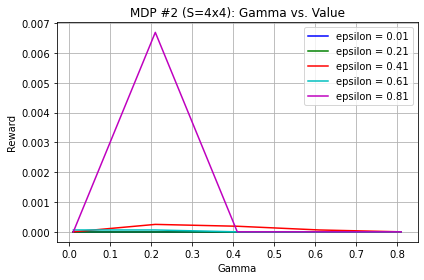

In [86]:
"""
Tune for epsilon and gamma together

"""


# declare state-size
ss = '4x4'
ql_discount[ss] = []
ql_epsilon[ss] = dict()
ql_value[ss] = dict()
ql_iterations[ss] = []
ql_time[ss] = []

for epsilon in np.arange(0.01, 1, .2):
    epsilon = round(epsilon, 2)
    ql_epsilon[ss][str(epsilon)] = []
    ql_value[ss][str(epsilon)] = []
    print(str(epsilon))
    for gamma in np.arange(0.01, 1, .2):
        ql = hiive.mdptoolbox.mdp.QLearning(P[ss], R[ss], gamma=gamma, epsilon=epsilon)
        #ql.setVerbose()
        ql.run()
        val = np.mean(ql.V)
        tim = ql.time
        ql_epsilon[ss][str(epsilon)].append(gamma)
        ql_value[ss][str(epsilon)].append(val)


    
# plot and show: Gamma vs. Value
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'gray', 'fuchsia']
count = 0
for epsilon in np.arange(0.01, 1, .2):
    epsilon = str(round(epsilon ,2))
    plt.plot(ql_epsilon[ss][epsilon], ql_value[ss][epsilon], color=colors[count], label="epsilon = {}".format(epsilon))
    count+=1
plt.title("MDP #2 (S={}): Gamma vs. Value".format(ss))
plt.xlabel("Gamma"), plt.ylabel("Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

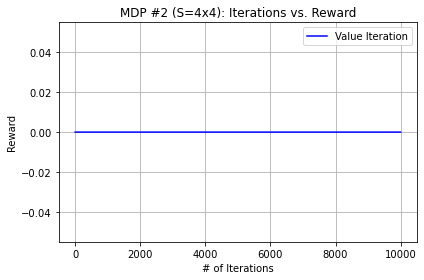

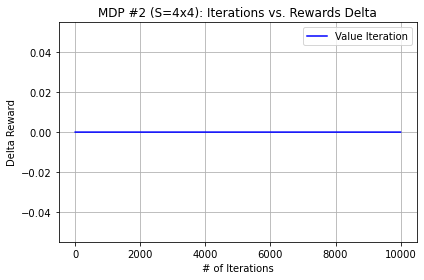

In [20]:
"""
Find iterations for convergence given gamma and epsilon

"""
# declare state-size
ss = '4x4'
ql = hiive.mdptoolbox.mdp.QLearning(P[ss], R[ss], gamma =.999, epsilon=0.00001)
ql.setVerbose()
ql.run()
val = np.mean(ql.V)

tim = ql.time
stats = ql.run_stats

iterlist = []
rewardlist = []

for i in range(0, len(stats)):
    iterlist.append(i)
    rewardlist.append(stats[i]['Max V'])
print(iterlist)
print(rewardlist)
delta = np.diff(rewardlist)
print("rewards delta: ", delta)
delta_delta = np.diff(delta)

for ix in range(0, len(delta_delta)):
    if abs(delta_delta[ix]) < .01:
        print("index where delta converged: ", ix)
        break
    
# plot and show: Iterations vs. Reward given Gamma
plt.plot(iterlist, rewardlist, color="blue", label="Value Iteration")
plt.title("MDP #2 (S={}): Iterations vs. Reward".format(ss))
plt.xlabel("# of Iterations"), plt.ylabel("Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

# plot and show: Iterations vs. Delta given Gamma
plt.plot(iterlist[1:], delta, color="blue", label="Value Iteration")
plt.title("MDP #2 (S={}): Iterations vs. Rewards Delta".format(ss))
plt.xlabel("# of Iterations"), plt.ylabel("Delta Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

val:  0.3260955770344057


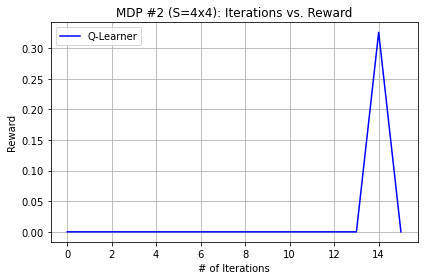

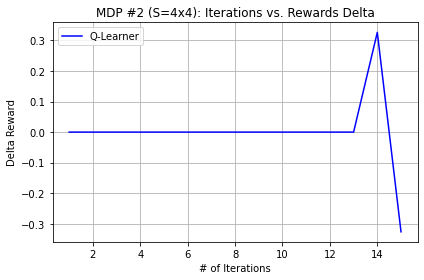

total time
[0.0009965896606445312, 0.0009965896606445312, 0.0009965896606445312, 0.0009965896606445312, 0.0009965896606445312, 0.0009965896606445312, 0.0009965896606445312, 0.0009965896606445312, 0.0009965896606445312, 0.0009965896606445312, 0.0009965896606445312, 0.0009965896606445312, 0.0009965896606445312, 0.0009965896606445312, 0.001996278762817383, 0.001996278762817383]


In [22]:
"""
Tune for epsilon decay

"""

# declare state-size
ss = '4x4'
ql_discount[ss] = []
ql_epsilon[ss] = []
ql_value[ss] = []
ql_iterations[ss] = []
ql_time[ss] = []
ql_alpha[ss] = []
ql_alpha_d[ss] = []
ql_epsilon_d[ss] = []

gamma=0.8
epsilon=0.65
alpha=0.5
alpha_d = 0.8
epsilon_d = 0.956
ql = hiive.mdptoolbox.mdp.QLearning(P[ss], R[ss], gamma=gamma, epsilon=epsilon, alpha=alpha, alpha_decay=alpha_d, epsilon_decay=epsilon_d)
ql.setVerbose()
ql.run()
val = np.max(ql.V)
tim = ql.time
stats = ql.run_stats

print("val: " , val)
# print("stats: ", stats)


iterlist = []
rewardlist = []
timelist = []

for i in range(0, len(ql.V)):
    iterlist.append(i)
    rewardlist.append(ql.V[i])
    timelist.append(stats[i]['Time'])

# print(iterlist)
# print(rewardlist)
delta = np.diff(rewardlist)
# print("rewards delta: ", delta)
delta_delta = np.diff(delta)

for ix in range(0, len(delta)):
    if abs(delta[ix]) < .0001 and delta[ix] > 0:
        print("index where delta converged: ", ix)
        break
    
# plot and show: Iterations vs. Reward given Gamma
plt.plot(iterlist, rewardlist, color="blue", label="Q-Learner")
plt.title("MDP #2 (S={}): Iterations vs. Reward".format(ss))
plt.xlabel("# of Iterations"), plt.ylabel("Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

# plot and show: Iterations vs. Delta given Gamma
plt.plot(iterlist[1:], delta, color="blue", label="Q-Learner")
plt.title("MDP #2 (S={}): Iterations vs. Rewards Delta".format(ss))
plt.xlabel("# of Iterations"), plt.ylabel("Delta Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

print("total time")
print(timelist)

this is count:  0
val:  0.0
this is count:  1
val:  0.0
this is count:  2
val:  0.0
this is count:  3
val:  0.003994003999
best reward updated to:  0.003994003999
best policy updated to:  (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0)
this is count:  4
val:  0.0
this is count:  5
val:  0.0
this is count:  6
val:  0.0
this is count:  7
val:  0.0
this is count:  8
val:  0.0
this is count:  9
val:  0.0
this is count:  10
val:  0.0
this is count:  11
val:  0.003994003999
this is count:  12
val:  0.0
this is count:  13
val:  0.0
this is count:  14
val:  0.0
this is count:  15
val:  0.005985019985005999
best reward updated to:  0.005985019985005999
best policy updated to:  (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0)
this is count:  16
val:  0.0
this is count:  17
val:  0.0
this is count:  18
val:  0.0
this is count:  19
val:  0.0
this is count:  20
val:  0.0
this is count:  21
val:  0.0
this is count:  22
val:  0.0
this is count:  23
val:  0.003994003999
this is count:  24
val:  0.003

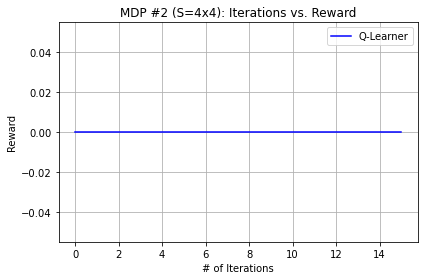

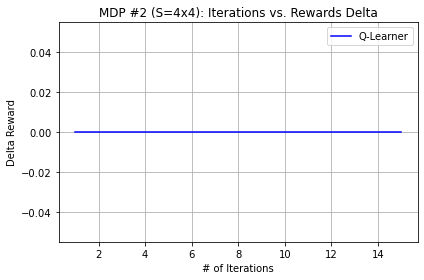

total time
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [63]:
"""
Tune for epsilon decay

"""

best_reward = 0
best_policy = None
for i in range(0, 50):
    print("this is count: ", i)
    # declare state-size
    ss = '4x4'
    ql_discount[ss] = []
    ql_epsilon[ss] = []
    ql_value[ss] = []
    ql_iterations[ss] = []
    ql_time[ss] = []
    ql_alpha[ss] = []
    ql_alpha_d[ss] = []
    ql_epsilon_d[ss] = []

    gamma=0.8
    epsilon=0.65
    alpha=0.5
    alpha_d = 0.8
    epsilon_d = 0.956
    ql = hiive.mdptoolbox.mdp.QLearning(P[ss], R[ss], gamma=gamma, epsilon=epsilon, alpha=alpha, alpha_decay=alpha_d, epsilon_decay=epsilon_d)
    ql.setVerbose()
    ql.run()
    val = np.max(ql.V)
    tim = ql.time
    stats = ql.run_stats

    print("val: " , val)
    # print("stats: ", stats)


    iterlist = []
    rewardlist = []
    timelist = []

    for i in range(0, len(ql.V)):
        iterlist.append(i)
        rewardlist.append(val)
        timelist.append(stats[i]['Time'])

    # print(iterlist)
    # print(rewardlist)
    delta = np.diff(rewardlist)
    # print("rewards delta: ", delta)
    delta_delta = np.diff(delta)

    for ix in range(0, len(delta)):
        if abs(delta[ix]) < .0001 and delta[ix] > 0:
            print("index where delta converged: ", ix)
            break
    
    if val > best_reward:
        print("best reward updated to: ", val)
        print("best policy updated to: ", ql.policy)
        best_reward = val
        best_policy = ql.policy
    
# plot and show: Iterations vs. Reward given Gamma
plt.plot(iterlist, rewardlist, color="blue", label="Q-Learner")
plt.title("MDP #2 (S={}): Iterations vs. Reward".format(ss))
plt.xlabel("# of Iterations"), plt.ylabel("Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

# plot and show: Iterations vs. Delta given Gamma
plt.plot(iterlist[1:], delta, color="blue", label="Q-Learner")
plt.title("MDP #2 (S={}): Iterations vs. Rewards Delta".format(ss))
plt.xlabel("# of Iterations"), plt.ylabel("Delta Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

print("total time")
print(timelist)

In [64]:
best_reward

0.011934219505791075

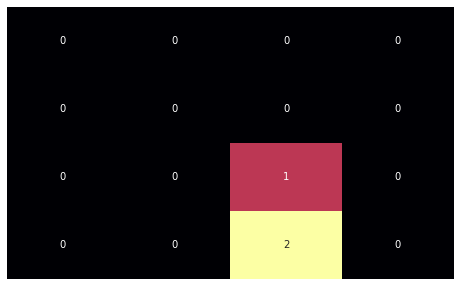

In [65]:
def plot_policy(policy, x, y):
    plt.figure(figsize=(8, 5))
    policy_2d = np.array(list(policy)).reshape(x, y)
    ax = sns.heatmap(policy_2d, cmap='inferno', annot=True, yticklabels=False, xticklabels=False, cbar=False)
    plt.show()
    
plot_policy(best_policy, 4, 4)

val:  0.4006


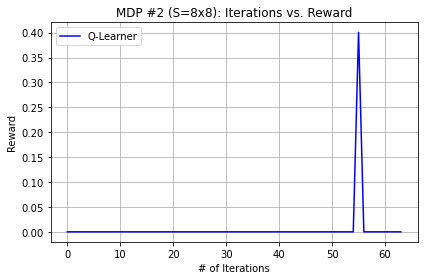

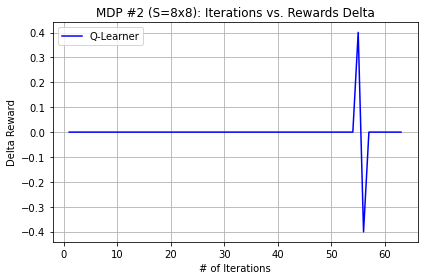

In [133]:
"""
Tune for epsilon decay

"""

# declare state-size
ss = '8x8'
ql_discount[ss] = []
ql_epsilon[ss] = []
ql_value[ss] = []
ql_iterations[ss] = []
ql_time[ss] = []
ql_alpha[ss] = []
ql_alpha_d[ss] = []
ql_epsilon_d[ss] = []

gamma=0.8
epsilon=0.65
alpha=0.5
alpha_d = 0.8
epsilon_d = 0.956
ql = hiive.mdptoolbox.mdp.QLearning(P[ss], R[ss], gamma=gamma, epsilon=epsilon, alpha=alpha, alpha_decay=alpha_d, epsilon_decay=epsilon_d)
ql.setVerbose()
ql.run()
val = np.max(ql.V)
tim = ql.time
stats = ql.run_stats

print("val: " , val)
# print("stats: ", stats)


iterlist = []
rewardlist = []

for i in range(0, len(ql.V)):
    iterlist.append(i)
    rewardlist.append(ql.V[i])
# print(iterlist)
# print(rewardlist)
delta = np.diff(rewardlist)
# print("rewards delta: ", delta)
delta_delta = np.diff(delta)

for ix in range(0, len(delta)):
    if abs(delta[ix]) < .0001 and delta[ix] > 0:
        print("index where delta converged: ", ix)
        break
    
# plot and show: Iterations vs. Reward given Gamma
plt.plot(iterlist, rewardlist, color="blue", label="Q-Learner")
plt.title("MDP #2 (S={}): Iterations vs. Reward".format(ss))
plt.xlabel("# of Iterations"), plt.ylabel("Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

# plot and show: Iterations vs. Delta given Gamma
plt.plot(iterlist[1:], delta, color="blue", label="Q-Learner")
plt.title("MDP #2 (S={}): Iterations vs. Rewards Delta".format(ss))
plt.xlabel("# of Iterations"), plt.ylabel("Delta Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

val:  0.0


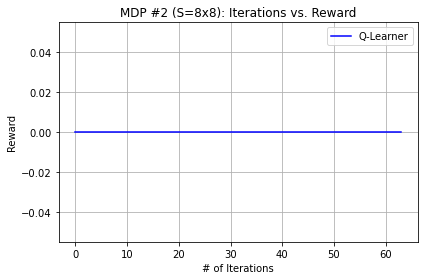

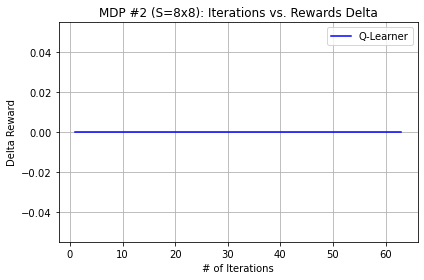

total time
[0.0, 0.0, 0.0009968280792236328, 0.0009968280792236328, 0.0009968280792236328, 0.0009968280792236328, 0.0009968280792236328, 0.0009968280792236328, 0.0009968280792236328, 0.0009968280792236328, 0.0009968280792236328, 0.0009968280792236328, 0.0009968280792236328, 0.0009968280792236328, 0.0009968280792236328, 0.0009968280792236328, 0.0009968280792236328, 0.0009968280792236328, 0.0009968280792236328, 0.0009968280792236328, 0.0009968280792236328, 0.0009968280792236328, 0.0009968280792236328, 0.0009968280792236328, 0.0009968280792236328, 0.0019931793212890625, 0.0019931793212890625, 0.0019931793212890625, 0.0019931793212890625, 0.0019931793212890625, 0.0019931793212890625, 0.0019931793212890625, 0.0019931793212890625, 0.0019931793212890625, 0.0019931793212890625, 0.0019931793212890625, 0.0019931793212890625, 0.0019931793212890625, 0.0019931793212890625, 0.0019931793212890625, 0.0029900074005126953, 0.0029900074005126953, 0.0029900074005126953, 0.0029900074005126953, 0.0029900074

In [41]:
"""
Tune for epsilon decay

"""

# declare state-size
ss = '8x8'
ql_discount[ss] = []
ql_epsilon[ss] = []
ql_value[ss] = []
ql_iterations[ss] = []
ql_time[ss] = []
ql_alpha[ss] = []
ql_alpha_d[ss] = []
ql_epsilon_d[ss] = []

gamma=0.8
epsilon=0.65
alpha=0.5
alpha_d = 0.8
epsilon_d = 0.956
ql = hiive.mdptoolbox.mdp.QLearning(P[ss], R[ss], gamma=gamma, epsilon=epsilon, alpha=alpha, alpha_decay=alpha_d, epsilon_decay=epsilon_d)
ql.setVerbose()
ql.run()
val = np.max(ql.V)
tim = ql.time
stats = ql.run_stats

print("val: " , val)
# print("stats: ", stats)


iterlist = []
rewardlist = []
timelist = []

for i in range(0, len(ql.V)):
    iterlist.append(i)
    rewardlist.append(ql.V[i])
    timelist.append(stats[i]['Time'])

# print(iterlist)
# print(rewardlist)
delta = np.diff(rewardlist)
# print("rewards delta: ", delta)
delta_delta = np.diff(delta)

for ix in range(0, len(delta)):
    if abs(delta[ix]) < .0001 and delta[ix] > 0:
        print("index where delta converged: ", ix)
        break
    
# plot and show: Iterations vs. Reward given Gamma
plt.plot(iterlist, rewardlist, color="blue", label="Q-Learner")
plt.title("MDP #2 (S={}): Iterations vs. Reward".format(ss))
plt.xlabel("# of Iterations"), plt.ylabel("Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

# plot and show: Iterations vs. Delta given Gamma
plt.plot(iterlist[1:], delta, color="blue", label="Q-Learner")
plt.title("MDP #2 (S={}): Iterations vs. Rewards Delta".format(ss))
plt.xlabel("# of Iterations"), plt.ylabel("Delta Reward"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

print("total time")
print(timelist)